In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ### Библиотека для рисования графичков, гистограмм, и проч.

### нужно писать магию чтобы графики рисовались внутри jupyter notebook 
%matplotlib inline              

##### Игрушечный пример

In [2]:
df = pd.DataFrame(
    data=np.array([
        ['f', 55, 171],
        ['f', 54, 180],
        ['f', 60, 173],
        ['f', 59, 180],
        ['m', 60, 177],
        ['m', 65, 177],
        ['m', 75, 165],
        ['m', 83, 182],
        ['m', 72, 165],
        ['m', 85, 183],
        ['f', 49, 172],
        ['f', 55, 155],
       ]).T, 
    index=['sex', 'weight', 'height']).T

In [3]:
df

,sex,weight,height
0,f,55,171
1,f,54,180
2,f,60,173
3,f,59,180
4,m,60,177
5,m,65,177
6,m,75,165
7,m,83,182
8,m,72,165
9,m,85,183


In [4]:
df.weight = df.weight.astype(np.int32)
df.height = df.height.astype(np.int32)

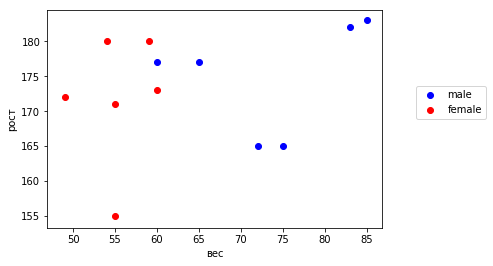

In [5]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

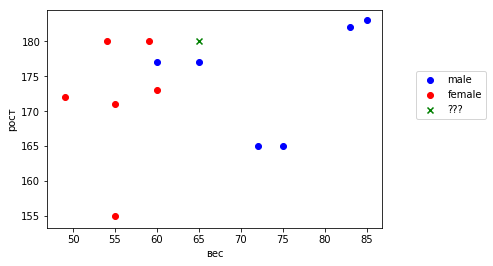

In [6]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');

plt.scatter(65, 180, color = 'green', marker='x', label='???');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

________

## Попредсказываем?

##### пандас умеет в интернет

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df = df[np.logical_and(df.age > 18, df.age < 50)] 

In [9]:
df.shape

(249, 4)

In [10]:
df_train = df.loc[:100]
df_test = df.loc[150:180]

In [11]:
df_train.head()

,height,weight,age,male
3,156.845,53.041915,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


In [12]:
def plot(df):
    plt.scatter(df.weight[df.male==1], df.height[df.male==1], color = 'blue', label='male');
    plt.scatter(df.weight[df.male==0], df.height[df.male==0], color = 'red', label='female');
    plt.legend(loc=[1.1, 0.5]);
    plt.ylabel('рост');
    plt.xlabel('вес');

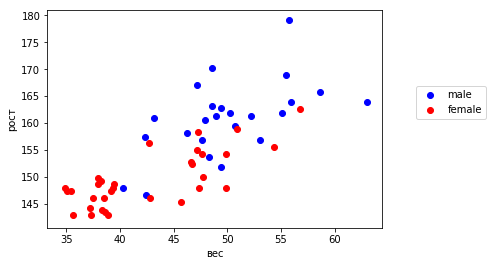

In [13]:
plot(df_train)

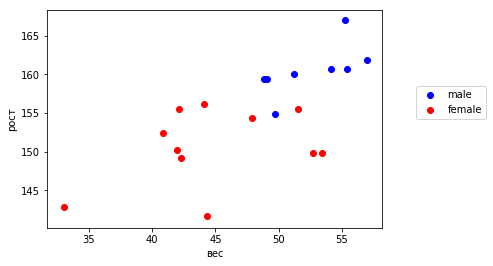

In [14]:
plot(df_test)

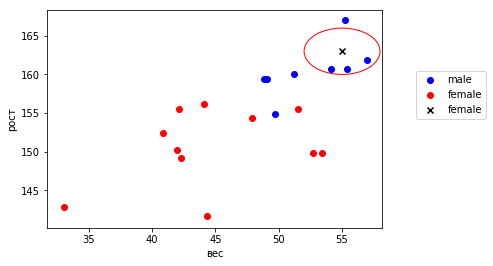

In [15]:
plt.scatter(df_test.weight[df_test.male==1], df_test.height[df_test.male==1], color = 'blue', label='male');
plt.scatter(df_test.weight[df_test.male==0], df_test.height[df_test.male==0], color = 'red', label='female');

plt.scatter(55, 163, color = 'black', marker='x', label='female');
c1 = plt.Circle((55, 163), 3, color='r', fill=False)
plt.gcf().gca().add_artist(c1)

plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

> Заметили почему наша окружность нарисовалась в виде эллипса?

##### Напишем свой классификатор который считает N-ближайших соседей - делает предсказание на основании большинства его соседей.

In [17]:
np.argsort( np.array([5,2,2,0,0]) ) # возвращает индексы элементов так 
                                    # как если бы элементы были отсортированы в порядке неубывания

array([3, 4, 1, 2, 0])

In [18]:
np.bincount( np.array([5,2,2,0,0]) ) # возвращает число вхождений каждого значения
                                     # длина массива - на один больше макс. значения

array([2, 0, 2, 0, 0, 1])

In [20]:
np.argmax( [1, 2, 200, 5, 2] )       # вернет позицию на которой стоит максимальный элемент

2

In [21]:
X_train = df_train[['height', 'weight']].values
y_train = df_train['male'].values

X_test = df_test[['height', 'weight']].values

In [22]:
X_train

array([[156.845    ,  53.0419145],
       [163.83     ,  62.992589 ],
       [149.225    ,  38.2434755],
       [168.91     ,  55.4799715],
       [147.955    ,  34.869885 ],
       [154.305    ,  49.89512  ],
       [149.9      ,  47.7      ],
       [163.195    ,  48.5626935],
       [157.48     ,  42.3258035],
       [143.9418   ,  38.3568735],
       [161.29     ,  48.987936 ],
       [156.21     ,  42.7226965],
       [148.59     ,  37.9032815],
       [147.32     ,  35.4652245],
       [147.955    ,  40.312989 ],
       [161.925    ,  55.111428 ],
       [146.05     ,  37.5063885],
       [146.05     ,  38.498621 ],
       [152.7048   ,  46.606578 ],
       [142.875    ,  38.838815 ],
       [142.875    ,  35.5786225],
       [147.955    ,  47.400364 ],
       [160.655    ,  47.8823055],
       [151.765    ,  49.4131785],
       [162.8648   ,  49.384829 ],
       [147.32     ,  39.12231  ],
       [147.955    ,  49.89512  ],
       [143.51     ,  38.55532  ],
       [146.7      ,

In [23]:
y_train

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [26]:
X_test

array([[154.305    ,  47.853956 ],
       [167.005    ,  55.1964765],
       [142.875    ,  32.998818 ],
       [152.4      ,  40.879979 ],
       [160.       ,  51.2      ],
       [159.385    ,  49.044635 ],
       [149.86     ,  53.4388075],
       [160.655    ,  54.090846 ],
       [160.655    ,  55.3665735],
       [149.225    ,  42.240755 ],
       [154.94     ,  49.6966735],
       [141.605    ,  44.338618 ],
       [150.1648   ,  41.95726  ],
       [155.575    ,  51.482692 ],
       [156.21     ,  44.111822 ],
       [149.86     ,  52.673371 ],
       [159.385    ,  48.8461885],
       [161.925    ,  56.9541455],
       [155.575    ,  42.0990075]])

##### Помните про эллипс?

In [27]:
a = X_test[0]
b = X_test[6]

In [28]:
a

array([154.305   ,  47.853956])

In [29]:
b

array([149.86     ,  53.4388075])

In [30]:
a - b

array([ 4.445    , -5.5848515])

In [31]:
np.sqrt(np.sum((a - b) ** 2))

7.137828190496895

##### Задумаемся! А если рост у нас не в сантиметрах, а в миллиметрах?

In [32]:
a[0] *= 10
b[0] *= 10

In [33]:
a

array([1543.05    ,   47.853956])

In [34]:
b

array([1498.6      ,   53.4388075])

In [35]:
a - b

array([44.45     , -5.5848515])

In [36]:
np.sqrt(np.sum((a - b) ** 2))

44.799476183065536

##### т.е. Мы почти проигнорили что у нас отличается вес на 5 килограммов и из-за особенности евклидова расстояния (квадрата) мы смотрели на большие значения !

Text(0.5, 0, 'разность')

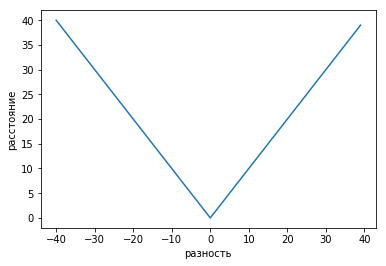

In [37]:
plt.plot([i for i in range(-40, 40)], [np.abs(i) for i in range(-40, 40)])
plt.ylabel('расстояние')
plt.xlabel('разность')

Text(0.5, 0, 'разность')

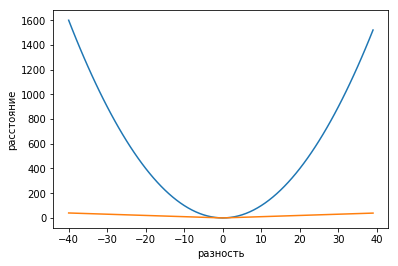

In [41]:
plt.plot([i for i in range(-40, 40)], [i ** 2 for i in range(-40, 40)])
plt.plot([i for i in range(-40, 40)], [np.abs(i) for i in range(-40, 40)])
plt.ylabel('расстояние')
plt.xlabel('разность')

_________

In [42]:
# стандартизуем

mean_ = X_train.mean(axis=0)
std_ = X_train.std(axis=0)

X_train = (X_train - mean_) / std_
X_test = (X_test - mean_) / std_

In [43]:
# отшкалируем

max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)

X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

In [44]:
X_test

array([[ 3.86842105e+01,  4.61693548e-01],
       [ 6.66666667e-01,  7.22782258e-01],
       [ 0.00000000e+00, -6.65322581e-02],
       [ 2.63157895e-01,  2.13709677e-01],
       [ 4.73131648e-01,  5.80673715e-01],
       [ 4.56140351e-01,  5.04032258e-01],
       [ 3.74561404e+01,  6.60282258e-01],
       [ 4.91228070e-01,  6.83467742e-01],
       [ 4.91228070e-01,  7.28830645e-01],
       [ 1.75438596e-01,  2.62096774e-01],
       [ 3.33333333e-01,  5.27217742e-01],
       [-3.50877193e-02,  3.36693548e-01],
       [ 2.01403509e-01,  2.52016129e-01],
       [ 3.50877193e-01,  5.90725806e-01],
       [ 3.68421053e-01,  3.28629032e-01],
       [ 1.92982456e-01,  6.33064516e-01],
       [ 4.56140351e-01,  4.96975806e-01],
       [ 5.26315789e-01,  7.85282258e-01],
       [ 3.50877193e-01,  2.57056452e-01]])

________

In [105]:
class KNN:
    """
    simple KNN classifier
    """
    
    def __init__(self, n):
        self.n = n
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = []
        assert len(X.shape) == 2
        for (h, w) in X:
            ### Посчитаем расстояние от всех элементов в тренировочной выборке
            # до текущего примера -> результат - вектор размерности трейна
            d = np.sqrt(  (self.X[:, 0] - h) ** 2 + (self.X[:, 1] - w) ** 2)
            ### Возьмем индексы n элементов, расстояние до которых минимально
            ### результат -> вектор из n элементов
            idx = np.argsort(d) [: self.n]
            ### Посчитаем частоту меток для каждого случая 
            ### результат -> вектор длинны 2 который покажет
            ### сколько соседей 0-го класса, сколько соседей 1-го класса.
            counts = np.bincount(self.y[idx].reshape(self.n))
            ### возьмем самый часто встречаемый в соседях класс.
            prediction = np.argmax(counts)
            y.append(prediction)
        return y

In [106]:
knn = KNN(8)

In [107]:
knn.fit(X_train, y_train)

In [108]:
y_pred = knn.predict(X_test)

In [109]:
'acc = %f' % np.mean(y_pred == df_test['male'].values)

'acc = 0.947368'

##### Круто. а где мы ошиблись ?

In [93]:
df_test[y_pred != df_test['male'].values]

,height,weight,age,male
165,154.94,49.696673,26.0,1


> мальчик ростом 154 см с весом ~50 кг. - кажется сложный кейс.

__________

In [94]:
# все есть в готовой бибилиотеке sklearn


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=8)
sc = StandardScaler()

X_train = df_train[['height', 'weight']].values
y_train = df_train['male'].values

X_test = df_test[['height', 'weight']].values

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(accuracy_score(df_test['male'].values, y_pred))

0.9473684210526315


In [95]:
http://cs231n.github.io/optimization-1/

SyntaxError: invalid syntax (<ipython-input-95-332a6c6b00c1>, line 1)